In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [407]:
from lib import sim_env as sim
from lib import loads
from lib.utils import (DTManager, adjust_db_dates_local_tz)
from lib import agents
import datetime

# environment
dt = current_time_tz(cut_microseconds=True)
env = sim.SimulationEnvironment(name='base', time_unit='seconds', starting_datetime=dt)
job_generator = loads.RandomJobGenerator(seed=2)
infstruct_mgr = sim.InfrastructureManager(env=env)
dispatcher = sim.Dispatcher(env=env, priority_rule='FIFO')

# source
area_source = sim.ProductionArea(env=env, custom_identifier=1000)
group_source = sim.StationGroup(env=env, custom_identifier=1000)
area_source.add_subsystem(group_source)
proc_time = dt_parser.timedelta_from_val(val=2., time_unit='hours')
source = sim.Source(env=env, custom_identifier='source', proc_time=proc_time, 
                random_generation=True, job_generator=job_generator, num_gen_jobs=5)
group_source.add_subsystem(source)

# sink
area_sink = sim.ProductionArea(env=env, custom_identifier=2000)
group_sink = sim.StationGroup(env=env, custom_identifier=2000)
area_sink.add_subsystem(group_sink)
sink = sim.Sink(env=env, custom_identifier='sink')
group_sink.add_subsystem(sink)

# processing stations
# prod area 1
area_prod = sim.ProductionArea(env=env, custom_identifier=1)
group_prod = sim.StationGroup(env=env, custom_identifier=1)
area_prod.add_subsystem(group_prod)
group_prod2 = sim.StationGroup(env=env, custom_identifier=2)
area_prod.add_subsystem(group_prod2)
# prod area 2
#area_prod2 = ProductionArea(env=env, custom_identifier=2)
#group_prod3 = StationGroup(env=env, custom_identifier=3)
#area_prod2.add_subsystem(group_prod3)
#area_prod.add_subsystem(group_prod3)
## machines
for machine in range(3):
    buffer = sim.Buffer(capacity=20, env=env, custom_identifier=(10+machine))
    if machine == 5:
        MachInst = sim.Machine(env=env, custom_identifier=machine, buffers=[buffer], setup_time=5.)
    else:
        MachInst = sim.Machine(env=env, custom_identifier=machine, buffers=[buffer])
        
    if machine == 0:
        testMachInst = MachInst
    
    if machine < 2:
        group_prod.add_subsystem(buffer)
        group_prod.add_subsystem(MachInst)
    elif machine >= 2:
        group_prod2.add_subsystem(buffer)
        group_prod2.add_subsystem(MachInst)
    else:
        pass
        #group_prod3.add_subsystem(buffer)
        #group_prod3.add_subsystem(MachInst)
    

add_machine_to_bottleneck: bool = False
if add_machine_to_bottleneck:
    buffer = sim.Buffer(capacity=20, env=env, custom_identifier=(10+machine+1))
    MachInst = sim.Machine(env=env, custom_identifier=machine+1, buffers=[buffer])
    group_prod3.add_subsystem(buffer)
    group_prod3.add_subsystem(MachInst)

alloc_agent = agents.AllocationAgent(assoc_system=area_prod)

alloc_agent._assoc_infstrct_objs

# station group IDs (system, custom) for processing stations
MachInst.supersystems_custom_ids

In [408]:
# datetime manager
dt_mgr = DTManager()
starting_dt = dt_mgr.current_time_tz(cut_microseconds=True)
# environment
env = sim.SimulationEnvironment(name='base', time_unit='seconds', starting_datetime=dt)
infstruct_mgr = sim.InfrastructureManager(env=env)
dispatcher = sim.Dispatcher(env=env, priority_rule='FIFO')
proc_time = dt_mgr.timedelta_from_val(val=2., time_unit='hours')
job_generator = loads.RandomJobGenerator(seed=2)
source = sim.Source(env=env, custom_identifier='source', proc_time=proc_time, 
                    random_generation=True, job_generator=job_generator, num_gen_jobs=4)
sim_dur = dt_parser.timedelta_from_val(val=2., time_unit='days')
job_gen_dur_cond = sim.JobGenDurationCondition(env=env, target_obj=source, sim_run_duration=sim_dur)

INFO:sim_env.env:Successfully registered Infrastructure Manager in Env >>base<<
INFO:sim_env.env:Successfully registered Dispatcher in Env >>base<<
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name Source_env_0


In [461]:
dt_mgr = DTManager()
dt_mgr.dt_with_tz_UTC(2024,3,23,12)

datetime.datetime(2024, 3, 23, 12, 0, tzinfo=datetime.timezone.utc)

In [493]:
def build_sim_env() -> tuple[
    sim.SimulationEnvironment,
    sim.InfrastructureManager,
    sim.Dispatcher,
    agents.AllocationAgent,
]:
    # !! REWORK, CURRENTLY ONLY FOR TESTING PURPOSES
    """Constructor to build simulation environment (layout)

    Returns
    -------
    tuple[ sim.SimulationEnvironment, sim.InfrastructureManager, sim.Dispatcher, agents.AllocationAgent, ]
        tuple out of Environment, InfrastructureManager, Dispatcher, Agent
    """
    # datetime manager
    dt_mgr = DTManager()
    starting_dt = dt_mgr.current_time_tz(cut_microseconds=True)
    # environment
    env = sim.SimulationEnvironment(name='base', time_unit='seconds', starting_datetime=dt)
    job_generator = loads.RandomJobGenerator(seed=2)
    infstruct_mgr = sim.InfrastructureManager(env=env)
    dispatcher = sim.Dispatcher(env=env, priority_rule='FIFO')
    
    # source
    area_source = sim.ProductionArea(env=env, custom_identifier=1000)
    group_source = sim.StationGroup(env=env, custom_identifier=1000)
    area_source.add_subsystem(group_source)
    proc_time = dt_mgr.timedelta_from_val(val=2., time_unit='hours')
    source = sim.Source(env=env, custom_identifier='source', proc_time=proc_time, 
                    random_generation=True, job_generator=job_generator, num_gen_jobs=4)
    group_source.add_subsystem(source)

    # sink
    area_sink = sim.ProductionArea(env=env, custom_identifier=2000)
    group_sink = sim.StationGroup(env=env, custom_identifier=2000)
    area_sink.add_subsystem(group_sink)
    sink = sim.Sink(env=env, custom_identifier='sink')
    group_sink.add_subsystem(sink)

    # processing stations
    # prod area 1
    area_prod = sim.ProductionArea(env=env, custom_identifier=1)
    group_prod = sim.StationGroup(env=env, custom_identifier=1)
    area_prod.add_subsystem(group_prod)
    group_prod2 = sim.StationGroup(env=env, custom_identifier=2)
    area_prod.add_subsystem(group_prod2)
    # prod area 2
    #area_prod2 = ProductionArea(env=env, custom_identifier=2)
    #group_prod3 = StationGroup(env=env, custom_identifier=3)
    #area_prod2.add_subsystem(group_prod3)
    #area_prod.add_subsystem(group_prod3)
    ## machines
    for machine in range(3):
        buffer = sim.Buffer(capacity=20, env=env, custom_identifier=(10+machine))
        if machine == 5:
            MachInst = sim.Machine(env=env, custom_identifier=machine, buffers=[buffer], setup_time=5.)
        else:
            MachInst = sim.Machine(env=env, custom_identifier=machine, buffers=[buffer])
            
        if machine == 0:
            testMachInst = MachInst
        
        if machine < 2:
            group_prod.add_subsystem(buffer)
            group_prod.add_subsystem(MachInst)
        elif machine >= 2:
            group_prod2.add_subsystem(buffer)
            group_prod2.add_subsystem(MachInst)
        else:
            pass
            #group_prod3.add_subsystem(buffer)
            #group_prod3.add_subsystem(MachInst)
        

    add_machine_to_bottleneck: bool = False
    if add_machine_to_bottleneck:
        buffer = sim.Buffer(capacity=20, env=env, custom_identifier=(10+machine+1))
        MachInst = sim.Machine(env=env, custom_identifier=machine+1, buffers=[buffer])
        group_prod3.add_subsystem(buffer)
        group_prod3.add_subsystem(MachInst)
        
    alloc_agent = agents.AllocationAgent(assoc_system=area_prod)

    # conditions
    duration_transient = dt_mgr.timedelta_from_val(val=2, time_unit='hours')
    trans_cond = sim.TransientCondition(env=env, duration_transient=duration_transient)
    agent_decision_cond = sim.TriggerAgentCondition(env=env)
    sim_dur = dt_parser.timedelta_from_val(val=2., time_unit='days')
    sim_end_date = dt_mgr.dt_with_tz_UTC(2024,3,23,12)
    job_gen_dur_cond = sim.JobGenDurationCondition(env=env, target_obj=source, sim_run_duration=sim_dur)
    
    return env, infstruct_mgr, dispatcher, alloc_agent

In [508]:
(env, infstruct_mgr, dispatcher, agent) = build_sim_env()

INFO:sim_env.env:Successfully registered Infrastructure Manager in Env >>base<<
INFO:sim_env.env:Successfully registered Dispatcher in Env >>base<<
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name ProductionArea_env_0
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name StationGroup_env_0
INFO:sim_env.infstrct:Successfully added System (type: StationGroup, custom_id: 1000, name: StationGroup_env_0) to System (type: ProductionArea, custom_id: 1000, name: ProductionArea_env_0).
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name Source_env_0
INFO:sim_env.infstrct:Successfully added System (type: Resource, custom_id: source, name: Source_env_0) to System (type: StationGroup, custom_id: 1000, name: StationGroup_env_0).
INFO:sim_env.infstrct:Successfully registered object with SystemID 1 and name ProductionArea_env_1
INFO:sim_env.infstrct:Successfully registered object with SystemID 1 and name StationGroup_env_1

In [495]:
infstruct_mgr.prod_area_db

,custom_id,name,prod_area,containing_proc_stations
prod_area_id,,,,
0,1000,ProductionArea_env_0,{0: {0: {}}},False
1,2000,ProductionArea_env_1,{1: {1: {}}},False
2,1,ProductionArea_env_2,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",True


In [496]:
infstruct_mgr.station_group_db

,custom_id,name,station_group,prod_area_id,containing_proc_stations
station_group_id,,,,,
0,1000,StationGroup_env_0,{0: {}},0,False
1,2000,StationGroup_env_1,{1: {}},1,False
2,1,StationGroup_env_2,"{2: {}, 3: {}, 4: {}, 5: {}}",2,True
3,2,StationGroup_env_3,"{6: {}, 7: {}}",2,True


In [497]:
infstruct_mgr.res_db

,custom_id,resource,name,res_type,state,station_group_id
res_id,,,,,,
0,source,{},Source_env_0,Source,INIT,0
1,sink,{},Sink_env_1,Sink,INIT,1
2,10,{},Buffer_env_2,Buffer,INIT,2
3,0,{},Machine_env_3,Machine,INIT,2
4,11,{},Buffer_env_4,Buffer,INIT,2
5,1,{},Machine_env_5,Machine,INIT,2
6,12,{},Buffer_env_6,Buffer,INIT,3
7,2,{},Machine_env_7,Machine,INIT,3


In [498]:
env.check_integrity()

INFO:sim_env.env:Integrity check for Environment base successful.


In [499]:
print('Prio Rules:', dispatcher.possible_prio_rules())
print('Alloc Rules:', dispatcher.possible_alloc_rules())

Prio Rules: {'SST', 'SPT', 'PRIO', 'LPT', 'FIFO', 'LST', 'LIFO'}
Alloc Rules: {'UTILISATION', 'RANDOM', 'WIP_LOAD_TIME', 'WIP_LOAD_JOBS', 'AGENT'}


In [500]:
dispatcher.curr_prio_rule = 'LPT'
dispatcher.curr_alloc_rule = 'WIP_LOAD_TIME'
#dispatcher.curr_alloc_rule = 'AGENT'

INFO:sim_env.dispatcher:Changed priority rule to LPT
INFO:sim_env.dispatcher:Changed allocation rule to WIP_LOAD_TIME


In [501]:
agent.assoc_infstrct_objs

(System (type: Resource, custom_id: 0, name: Machine_env_3),
 System (type: Resource, custom_id: 1, name: Machine_env_5),
 System (type: Resource, custom_id: 2, name: Machine_env_7))

**Sequential run**

In [502]:
agent.dispatching_signal

False

In [511]:
## second block in step function
## execute with provided action till next decision should be made
while not agent.dispatching_signal:
    #if env.sim_ended:
        #break
    # empty event list, simulation run ended
    if not env._event_list:
        break
    env.step()
    #print(f'Env Trans State: {env.is_transient_cond}')


## third block
## calculate reward before next decision is made


 
## first block in step function
## action is provided as parameter
## set action
# if still events left, get/set action
#if env._event_list and not env.is_transient_cond:
if env._event_list:
    print('Dispatching Signal', agent.dispatching_signal)
    action = agent.random_action()
    agent.set_decision(action=action)
else:
    print('Run ended!')

--------------- DEBUG: call after hold(0) at 14400.0
DEBUG:sim_env.dispatcher:[DISPATCHER: Dispatcher(env: base)] Next operation Operation(ProcTime: 7:00:00, ExecutionSystemID: 1, SGI: 1)
DEBUG:sim_env.dispatcher:('[DISPATCHER: Dispatcher(env: base)] Available stations at 14400.0 ', 'are (System (type: Resource, custom_id: 0, name: Machine_env_3), System (type: Resource, custom_id: 1, name: Machine_env_5), System (type: Resource, custom_id: 2, name: Machine_env_7))')
DEBUG:sim_env.agents:Action feasibility status: True
DEBUG:sim_env.dispatcher:[DISPATCHER: Dispatcher(env: base)] Next operation is Operation(ProcTime: 7:00:00, ExecutionSystemID: 1, SGI: 1) with machine group (machine) System (type: Resource, custom_id: 0, name: Machine_env_3)
INFO:sim_env.dispatcher:Successfully registered job with JobID 3 and name J_gen_3
INFO:sim_env.dispatcher:Successfully registered operation with OpID 3 and name O_gen_3
DEBUG:agents.agents:Dispatching signal for >>Agent(type=ALLOC, Assoc_Syst_ID=2)<

**Customised Salabim:**
- added ``self.end_on_empty_eventlist`` as this attribute was not available, but used internally in Salabim
- ~~added ``sim_ended`` to indicate if run was finished or~~ use ``_event_list``

**Needed Features:**
- condition monitor to set flags

In [394]:
s1 = 2
s2 = 3

In [395]:
tup = (s1, s2)

In [396]:
all(tup)

True

**Complete run**

In [486]:
(env, infstruct_mgr, dispatcher, agent) = build_sim_env()

INFO:sim_env.env:Successfully registered Infrastructure Manager in Env >>base<<
INFO:sim_env.env:Successfully registered Dispatcher in Env >>base<<
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name ProductionArea_env_0
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name StationGroup_env_0
INFO:sim_env.infstrct:Successfully added System (type: StationGroup, custom_id: 1000, name: StationGroup_env_0) to System (type: ProductionArea, custom_id: 1000, name: ProductionArea_env_0).
INFO:sim_env.infstrct:Successfully registered object with SystemID 0 and name Source_env_0
INFO:sim_env.infstrct:Successfully added System (type: Resource, custom_id: source, name: Source_env_0) to System (type: StationGroup, custom_id: 1000, name: StationGroup_env_0).
INFO:sim_env.infstrct:Successfully registered object with SystemID 1 and name ProductionArea_env_1
INFO:sim_env.infstrct:Successfully registered object with SystemID 1 and name StationGroup_env_1

In [487]:
env.run()

INFO:sim_env.dispatcher:Successfully registered job with JobID 0 and name J_gen_0
INFO:sim_env.dispatcher:Successfully registered operation with OpID 0 and name O_gen_0
--------------- DEBUG: call before hold(0) at 0.0
--------------- DEBUG: call after hold(0) at 0.0
DEBUG:sim_env.dispatcher:[DISPATCHER: Dispatcher(env: base)] Next operation Operation(ProcTime: 6:00:00, ExecutionSystemID: 1, SGI: 1)
DEBUG:sim_env.dispatcher:('[DISPATCHER: Dispatcher(env: base)] Available stations at 0.0 ', 'are [System (type: Resource, custom_id: 0, name: Machine_env_3), System (type: Resource, custom_id: 1, name: Machine_env_5)]')
DEBUG:sim_env.dispatcher:[DISPATCHER: Dispatcher(env: base)] Next operation is Operation(ProcTime: 6:00:00, ExecutionSystemID: 1, SGI: 1) with machine group (machine) System (type: Resource, custom_id: 0, name: Machine_env_3)
INFO:sim_env.dispatcher:[DISPATCHER: Dispatcher(env: base)] REQUEST TO DISPATCHER FOR SEQUENCING
INFO:sim_env.conditions:[CONDITION TransientCondition]

In [488]:
env.finalise()

INFO:sim_env.infstrct:Successful finalisation of the state information for all resource objects.


In [489]:
dispatcher.op_db.head()

,job_id,job_name,custom_id,op,name,prio,execution_system,execution_system_custom_id,execution_system_name,execution_system_type,...,creation_date,release_date,planned_starting_date,actual_starting_date,starting_date_deviation,planned_ending_date,actual_ending_date,ending_date_deviation,lead_time,state
op_id,,,,,,,,,,,,,,,,,,,,,
0,0,J_gen_0,None,"Operation(ProcTime: 6:00:00, ExecutionSystemID...",O_gen_0,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 08:13:58+00:00,2024-03-22 08:13:58+00:00,None,2024-03-22 08:13:58+00:00,None,None,2024-03-22 15:13:58+00:00,None,7:00:00,FINISH
1,1,J_gen_1,None,"Operation(ProcTime: 9:00:00, ExecutionSystemID...",O_gen_1,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 10:13:58+00:00,2024-03-22 10:13:58+00:00,None,2024-03-22 10:13:58+00:00,None,None,2024-03-23 02:13:58+00:00,None,16:00:00,FINISH
2,2,J_gen_2,None,"Operation(ProcTime: 7:00:00, ExecutionSystemID...",O_gen_2,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 12:13:58+00:00,2024-03-22 12:13:58+00:00,None,2024-03-22 12:13:58+00:00,None,None,2024-03-23 03:13:58+00:00,None,15:00:00,FINISH
3,3,J_gen_3,None,"Operation(ProcTime: 5:00:00, ExecutionSystemID...",O_gen_3,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 14:13:58+00:00,2024-03-22 14:13:58+00:00,None,2024-03-22 15:13:58+00:00,None,None,2024-03-22 22:13:58+00:00,None,8:00:00,FINISH


In [490]:
dispatcher.job_db

,custom_id,job,name,job_type,prio,total_proc_time,creation_date,release_date,planned_starting_date,actual_starting_date,starting_date_deviation,planned_ending_date,actual_ending_date,ending_date_deviation,lead_time,state
job_id,,,,,,,,,,,,,,,,
0,None,Job (J_gen_0),J_gen_0,Job,1,0 days 06:00:00,2024-03-22 08:13:58+00:00,2024-03-22 08:13:58+00:00,2023-11-20 06:00:00+00:00,2024-03-22 08:13:58+00:00,"123 days, 2:13:58",2023-12-01 10:00:00+00:00,2024-03-22 15:13:58+00:00,"112 days, 5:13:58",7:00:00,FINISH
1,None,Job (J_gen_1),J_gen_1,Job,8,0 days 09:00:00,2024-03-22 10:13:58+00:00,2024-03-22 10:13:58+00:00,2023-11-20 06:00:00+00:00,2024-03-22 10:13:58+00:00,"123 days, 4:13:58",2023-12-01 10:00:00+00:00,2024-03-23 02:13:58+00:00,"112 days, 16:13:58",16:00:00,FINISH
2,None,Job (J_gen_2),J_gen_2,Job,5,0 days 07:00:00,2024-03-22 12:13:58+00:00,2024-03-22 12:13:58+00:00,2023-11-20 06:00:00+00:00,2024-03-22 12:13:58+00:00,"123 days, 6:13:58",2023-12-01 10:00:00+00:00,2024-03-23 03:13:58+00:00,"112 days, 17:13:58",15:00:00,FINISH
3,None,Job (J_gen_3),J_gen_3,Job,9,0 days 05:00:00,2024-03-22 14:13:58+00:00,2024-03-22 14:13:58+00:00,2023-11-20 06:00:00+00:00,2024-03-22 15:13:58+00:00,"123 days, 9:13:58",2023-12-01 10:00:00+00:00,2024-03-22 22:13:58+00:00,"112 days, 12:13:58",8:00:00,FINISH


In [491]:
dispatcher._op_db_date_adjusted

,job_id,job_name,custom_id,op,name,prio,execution_system,execution_system_custom_id,execution_system_name,execution_system_type,...,creation_date,release_date,planned_starting_date,actual_starting_date,starting_date_deviation,planned_ending_date,actual_ending_date,ending_date_deviation,lead_time,state
op_id,,,,,,,,,,,,,,,,,,,,,
0,0,J_gen_0,None,"Operation(ProcTime: 6:00:00, ExecutionSystemID...",O_gen_0,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 09:13:58+01:00,2024-03-22 09:13:58+01:00,None,2024-03-22 09:13:58+01:00,None,None,2024-03-22 16:13:58+01:00,None,7:00:00,FINISH
1,1,J_gen_1,None,"Operation(ProcTime: 9:00:00, ExecutionSystemID...",O_gen_1,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 11:13:58+01:00,2024-03-22 11:13:58+01:00,None,2024-03-22 11:13:58+01:00,None,None,2024-03-23 03:13:58+01:00,None,16:00:00,FINISH
2,2,J_gen_2,None,"Operation(ProcTime: 7:00:00, ExecutionSystemID...",O_gen_2,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 13:13:58+01:00,2024-03-22 13:13:58+01:00,None,2024-03-22 13:13:58+01:00,None,None,2024-03-23 04:13:58+01:00,None,15:00:00,FINISH
3,3,J_gen_3,None,"Operation(ProcTime: 5:00:00, ExecutionSystemID...",O_gen_3,None,"{2: {2: {}, 3: {}, 4: {}, 5: {}}, 3: {6: {}, 7...",1,<bound method System.name of System (type: Pro...,ProductionArea,...,2024-03-22 15:13:58+01:00,2024-03-22 15:13:58+01:00,None,2024-03-22 16:13:58+01:00,None,None,2024-03-22 23:13:58+01:00,None,8:00:00,FINISH


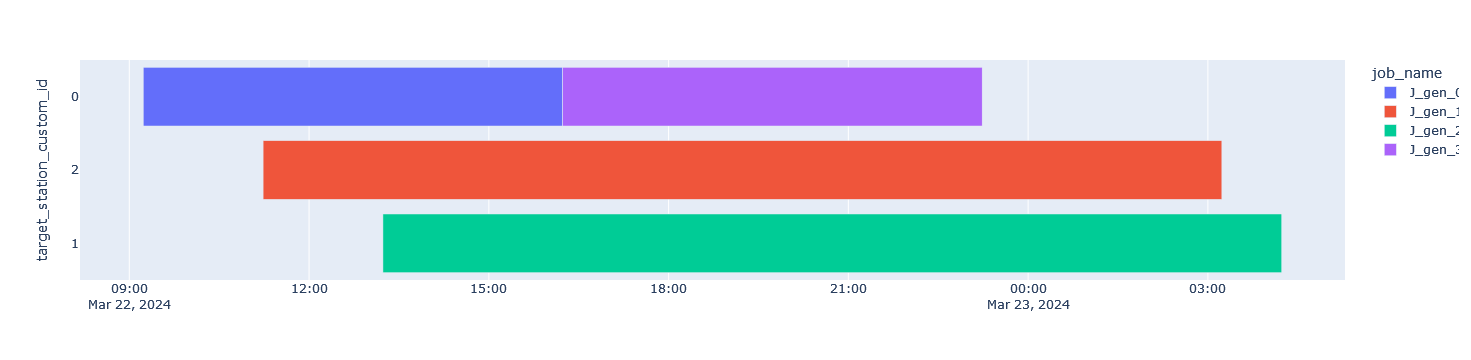

In [492]:
fig = dispatcher.draw_gantt_chart(dates_to_local_tz=True)